In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")
sample=pd.read_csv("/content/sample_submission.csv")

In [ ]:
a=sample['Class']
test['Class']=a

'EK','Skewness','Mean_DMSNR_Curve','SD_DMSNR_Curve'

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN

x= train.drop(['Class','id'],axis=1)
y=train['Class']

over_X_train, over_y_train = RandomOverSampler(sampling_strategy='minority').fit_resample(x, y)
# SMOTE
smote_X_train, smote_y_train = SMOTE().fit_resample(x,y)
# Boderline-SMOTE
bdlsmote_X_train, bdlsmote_y_train = BorderlineSMOTE().fit_resample(x, y)
# Boderline-SMOTE SVM
bdlSVMsmote_X_train, bdlSVMsmote_y_train = SVMSMOTE().fit_resample(x, y)
# ADASYN
adasyn_X_train, adasyn_y_train = ADASYN().fit_resample(x, y)
# SMOTE-TomekLinks
smotetomek_X_train, smotetomek_y_train = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')).fit_resample(x, y)
# SMOTE-ENN
smoteenn_X_train, smoteenn_y_train = SMOTEENN().fit_resample(x, y)


In [ ]:
datasets = [x, y, over_X_train, over_y_train, smote_X_train, smote_y_train,
            bdlsmote_X_train, bdlsmote_y_train, bdlSVMsmote_X_train, bdlSVMsmote_y_train, 
            adasyn_X_train, adasyn_y_train, smotetomek_X_train, smotetomek_y_train, 
            smoteenn_X_train, smoteenn_y_train]

for dataset in datasets:
    pd.DataFrame(dataset)

In [ ]:
over_train_concat = pd.concat([over_X_train, over_y_train], axis=1)
smote_train_concat = pd.concat([smote_X_train, smote_y_train], axis=1)
bdlsmote_train_concat = pd.concat([bdlsmote_X_train, bdlsmote_y_train], axis=1)
bdlSVMsmote_train_concat = pd.concat([bdlSVMsmote_X_train, bdlSVMsmote_y_train], axis=1)
adasyn_train_concat = pd.concat([adasyn_X_train, adasyn_y_train], axis=1)
smotetomek_train_concat = pd.concat([smotetomek_X_train, smotetomek_y_train], axis=1)
smoteenn_train_concat = pd.concat([smoteenn_X_train, smoteenn_y_train], axis=1)

In [ ]:
over_X_train, over_y_train = RandomOverSampler(sampling_strategy='minority').fit_resample(x, y)
# SMOTE
smote_X_train, smote_y_train = SMOTE().fit_resample(x,y)
# Boderline-SMOTE
bdlsmote_X_train, bdlsmote_y_train = BorderlineSMOTE().fit_resample(x, y)
# Boderline-SMOTE SVM
bdlSVMsmote_X_train, bdlSVMsmote_y_train = SVMSMOTE().fit_resample(x, y)
# ADASYN
adasyn_X_train, adasyn_y_train = ADASYN().fit_resample(x, y)
# SMOTE-TomekLinks
smotetomek_X_train, smotetomek_y_train = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')).fit_resample(x, y)
# SMOTE-ENN
smoteenn_X_train, smoteenn_y_train = SMOTEENN().fit_resample(x, y)

In [ ]:
print("Random Oversampling\n", over_y_train.value_counts())
# SMOTE
print("SMOTE\n", smote_y_train.value_counts())
# Boderline-SMOTE
print("Borderline-SMOTE\n", bdlsmote_y_train.value_counts())
# Boderline-SMOTE SVM
print("Borderline-SMOTE SVM\n", bdlSVMsmote_y_train.value_counts())
# ADASYN
print("ADASYN\n", adasyn_y_train.value_counts())
# SMOTE-TomekLinks
print("SMOTE-TomekLinks\n", smotetomek_y_train.value_counts())
# SMOTE-ENN
print("SMOTE-ENN\n", smoteenn_y_train.value_counts())

Random Oversampling
 0    106597
1    106597
Name: Class, dtype: int64
SMOTE
 0    106597
1    106597
Name: Class, dtype: int64
Borderline-SMOTE
 0    106597
1    106597
Name: Class, dtype: int64
Borderline-SMOTE SVM
 0    106597
1    106597
Name: Class, dtype: int64
ADASYN
 1    107023
0    106597
Name: Class, dtype: int64
SMOTE-TomekLinks
 1    106597
0    106405
Name: Class, dtype: int64
SMOTE-ENN
 1    105504
0    102628
Name: Class, dtype: int64


(array([102628.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 105504.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

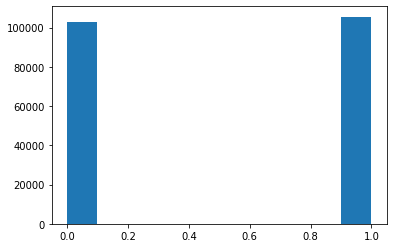

In [ ]:
plt.hist(smoteenn_y_train)